<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Boston Housing Price Analysis: Factors Influencing Property Values

#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'ModuleNotFoundError'>: No module named 'statsmodels'

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

# Task 1: Become familiar with the dataset

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
# Check the first few rows of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations

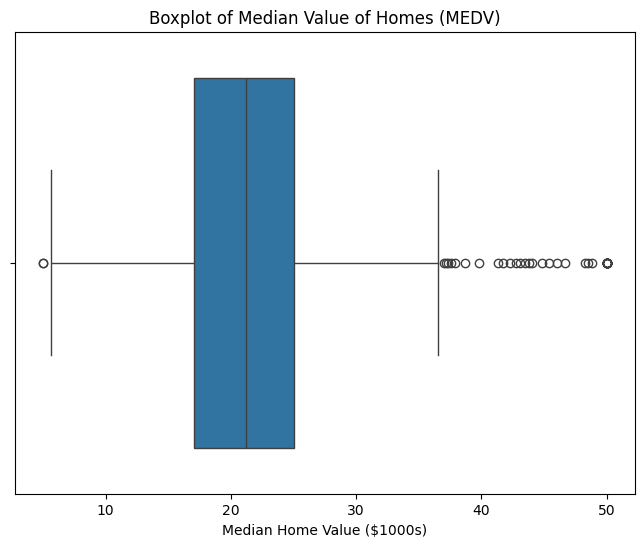

In [7]:
# Boxplot for the median value of houses (MEDV)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Homes (MEDV)')
plt.xlabel('Median Home Value ($1000s)')
plt.show()

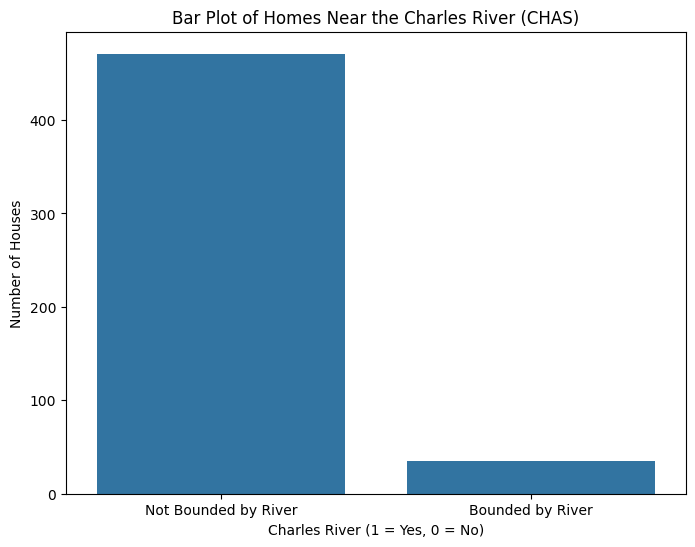

In [8]:
# Bar plot for the Charles River (CHAS) variable
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Homes Near the Charles River (CHAS)')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Houses')
plt.xticks([0, 1], ['Not Bounded by River', 'Bounded by River'])
plt.show()


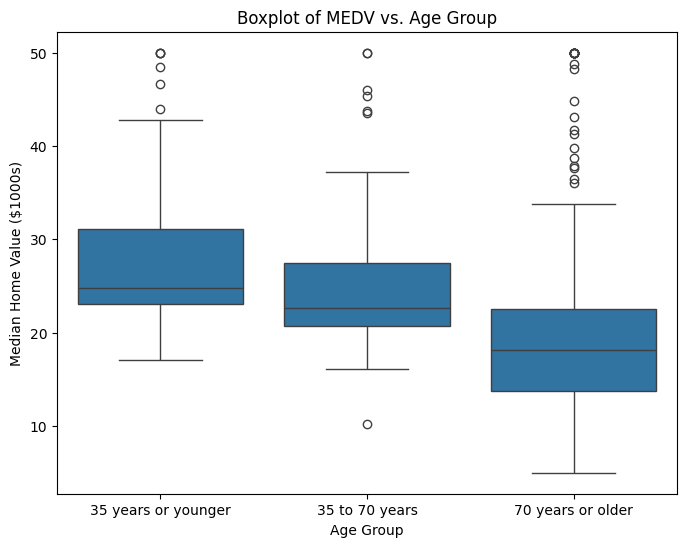

In [9]:
# Discretizing the AGE variable into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years or younger', '35 to 70 years', '70 years or older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Home Value ($1000s)')
plt.show()


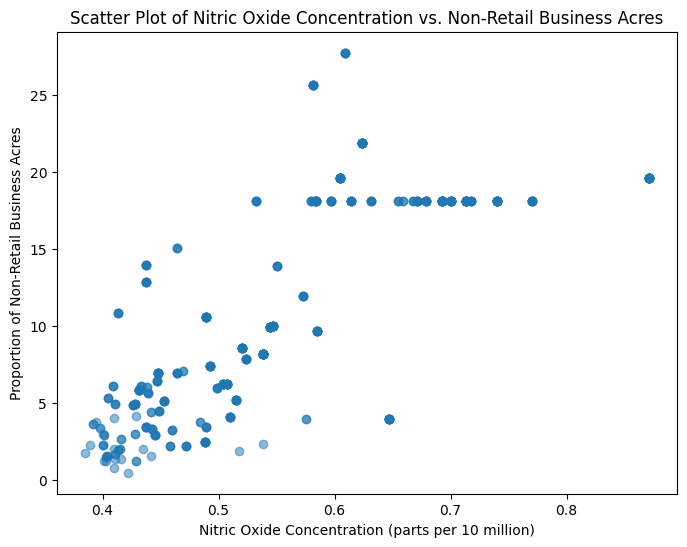

In [10]:
# Scatter plot for NOX vs. INDUS
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Scatter Plot of Nitric Oxide Concentration vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


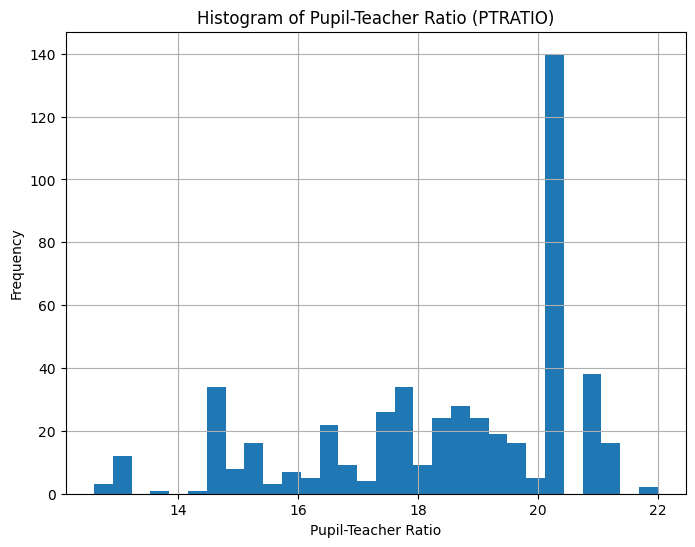

In [11]:
# Histogram for PTRATIO (Pupil to Teacher Ratio)
plt.figure(figsize=(8, 6))
boston_df['PTRATIO'].hist(bins=30)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


## Task 3: Perform Statistical Tests
### Now, let's proceed with the statistical tests to answer the provided questions.

## 1. Is there a significant difference in the median value of houses between those bounded by the Charles River and those not? (T-test for independent samples)

In [12]:
from scipy import stats

# Group the data based on whether the house is bounded by the Charles River or not
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Test results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the median value of houses between those bounded by the Charles River and those not.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the median value of houses between those bounded by the Charles River and those not.")


Reject the null hypothesis. There is a significant difference in the median value of houses between those bounded by the Charles River and those not.


## 2. Is there a difference in the median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 (AGE)? (ANOVA)

In [13]:
# Perform ANOVA
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years or younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 years or older']['MEDV']
)

# Test results
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the median values of houses based on the proportion of owner-occupied units built before 1940.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the median values of houses based on the proportion of owner-occupied units built before 1940.")


Reject the null hypothesis. There is a significant difference in the median values of houses based on the proportion of owner-occupied units built before 1940.


## 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

In [14]:
# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Test results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")


Reject the null hypothesis. There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.


## 4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression Analysis)

In [15]:
import statsmodels.api as sm

# Define independent and dependent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Test results
if model.pvalues[1] < alpha:  # Check the p-value for 'DIS'
    print("Reject the null hypothesis. There is a significant relationship between the distance to employment centers and the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between the distance to employment centers and the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        09:21:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<ipython-input-15-6ff6d6c3eacb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < alpha:  # Check the p-value for 'DIS'


Reject the null hypothesis. There is a significant relationship between the distance to employment centers and the median value of owner-occupied homes.


# Conclusion:
## For each test:

### If the p-value is less than 0.05, you reject the null hypothesis and conclude that there is a significant effect or relationship.
### If the p-value is greater than or equal to 0.05, you fail to reject the null hypothesis and conclude that there is no significant effect or relationship.

# AUTHOR
## Rodolpho J. A. Nascimento